In [1]:
%matplotlib inline
import numpy as np 

from astropy.table import Table, Column
import astropy.units as u
import astropy.constants as const

import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'stixgeneral'

from glob import glob

In [2]:
use1sig = False
ecolor = plt.cm.Greys(0.6)
color = plt.cm.Greys(0.8)
fs = 16 
al = 1

ions = ['HI', 'CII', 'CIV', 'SiII', 'SiIII', 'SiIV']
ions_eagle = ['h1', 'c2', 'c4', 'si2', 'si3', 'si4']

In [3]:
#use_color = True
#from load_cgm_dwarf_mod import init_logN_rho_plot
from load_cgm_dwarf_mod import get_percentile, plot_posterior, linear_model
from load_cgm_dwarf_mod import read_ion_measurements_logN, plot_obsdata

Read in simulation data from EAGLE 

In [4]:
rlabel = 'useR200m' # 'useR200c'
eagle_file = 'data/eagle/coldens.run_makefigs_subfind_L012N0376_eagle.NEQ.snap023.056_z000p000.150kpc.sh.mean_{}.dat'.format(rlabel)

In [5]:
medlogN_tb = Table.read(eagle_file, format='ascii')
medlogN_tb.show_in_notebook()

idx,MHalo_lo,Mhalo_hi,mean(Mhalo),mean(MStar),mean(Hfull),mean(H),mean(HI),mean(C),mean(CII),mean(CIV),mean(Si),mean(SiII),mean(SiIII),mean(SiIV),mean(Silow),mean(O),mean(OVI)
0,9.5,10.0,9.917,6.23401,19.3334,18.6225,13.3953,13.5951,9.79518,11.711,12.6708,7.02078,8.78824,9.04376,9.28262,13.888,12.6142
1,10.0,10.5,10.19,6.84578,19.4246,18.7112,14.8864,13.8077,10.6346,11.9302,12.8843,9.43553,10.2485,10.1038,10.5347,14.0849,12.7037
2,10.5,11.0,10.74,7.98227,19.6083,18.9322,15.7479,13.9343,12.3988,12.5559,12.9894,11.4205,11.5834,11.0294,11.8782,14.2225,13.0515
3,11.0,11.5,11.19,8.89031,19.7586,19.1303,16.8388,14.5076,13.7747,13.0519,13.5767,12.8843,12.5598,11.8708,13.0817,14.7984,13.4293
4,11.5,12.0,11.71,9.76723,19.9322,19.3458,16.8983,15.003,14.0948,13.5143,14.1209,13.2636,13.0022,12.3727,13.4863,15.2865,13.8662
5,12.0,12.5,12.17,10.2312,20.0859,19.683,17.5442,15.4504,14.6447,13.812,14.5897,13.8264,13.4898,12.7962,14.0191,15.7313,14.1449


In [15]:
# calculate total ion mass for eagle galaxies
def get_ion_mass(ion_label, au_mass, medlogN_tb, rmin=13.6):
    # minimum integration range for the HI mass 
    # au_mass: atomic mass 
    # ion_label: Si, SiI, SiIII, SiIV, Silow
    med_logN = medlogN_tb['mean({})'.format(ion_label)]
    med_logMh = medlogN_tb['mean(Mhalo)']
    
    from yztools.calc_r200 import calc_r200
    med_r200 = calc_r200(medlogN_tb['mean(Mhalo)'], label='200m')[0]
    # med_r200 = calc_r200(medlogN_tb['mean(Mhalo)'])[1][0] # matter density 
    
    # print(med_r200)
    med_N = (10**med_logN)/u.cm**2
    tot_mass = ((med_N*np.pi*(med_r200*u.kpc)**2)*(const.m_p * au_mass)).to(u.Msun).value # Msun
    minr_mass = ((med_N*np.pi*(rmin*u.kpc)**2)*(const.m_p * au_mass)).to(u.Msun).value # Msun
    return tot_mass-minr_mass

In [16]:
tot_mass_Si = get_ion_mass('Si', 28, medlogN_tb)
tot_mass_SiII = get_ion_mass('SiII', 28, medlogN_tb)
tot_mass_SiIII = get_ion_mass('SiIII', 28, medlogN_tb)
tot_mass_SiIV = get_ion_mass('SiIV', 28, medlogN_tb)
tot_mass_Silow = tot_mass_SiII+tot_mass_SiIII+tot_mass_SiIV

tot_mass_H = get_ion_mass('H', 1, medlogN_tb)
tot_mass_HI = get_ion_mass('HI', 1, medlogN_tb)

tot_mass_C = get_ion_mass('C', 12, medlogN_tb)
tot_mass_CII = get_ion_mass('CII', 12, medlogN_tb)
tot_mass_CIV = get_ion_mass('CIV', 12, medlogN_tb)
tot_mass_Clow = tot_mass_CII+tot_mass_CIV 

tot_mass_O = get_ion_mass('O', 16, medlogN_tb)
tot_mass_OVI = get_ion_mass('OVI', 16, medlogN_tb)

print(np.asarray(medlogN_tb['mean(Mhalo)']))
print(tot_mass_H)

[ 9.917 10.19  10.74  11.19  11.71  12.17 ]
[4.00537701e+08 7.61333438e+08 2.99810309e+09 9.50089447e+09
 3.47644783e+10 1.53378392e+11]


In [8]:
# closest to our sample's median mass
sample_mean_logMhalo = 10.9
sample_mean_ind = np.argmin(np.abs(medlogN_tb['mean(Mhalo)']-sample_mean_logMhalo))
print(sample_mean_ind, medlogN_tb['mean(Mhalo)'][sample_mean_ind])
print('Median halo mass:', medlogN_tb['mean(Mhalo)'][sample_mean_ind])
print('log HI mass: %.2f,%.2f,%.2f'%(np.log10(tot_mass_HI[sample_mean_ind-1]), 
                                     np.log10(tot_mass_HI[sample_mean_ind]), 
                                     np.log10(tot_mass_HI[sample_mean_ind+1])))
print('log SiII mass: %.2f,%.2f,%.2f'%(np.log10(tot_mass_SiII[sample_mean_ind-1]), 
                                     np.log10(tot_mass_SiII[sample_mean_ind]), 
                                     np.log10(tot_mass_SiII[sample_mean_ind+1])))
print('log SiIII mass: %.2f,%.2f,%.2f'%(np.log10(tot_mass_SiIII[sample_mean_ind-1]), 
                                     np.log10(tot_mass_SiIII[sample_mean_ind]), 
                                     np.log10(tot_mass_SiIII[sample_mean_ind+1])))
print('log SiIV mass: %.2f,%.2f,%.2f'%(np.log10(tot_mass_SiIV[sample_mean_ind-1]), 
                                     np.log10(tot_mass_SiIV[sample_mean_ind]), 
                                     np.log10(tot_mass_SiIV[sample_mean_ind+1])))
print('log CII mass: %.2f,%.2f,%.2f'%(np.log10(tot_mass_CII[sample_mean_ind-1]), 
                                     np.log10(tot_mass_CII[sample_mean_ind]), 
                                     np.log10(tot_mass_CII[sample_mean_ind+1])))
print('log CIV mass: %.2f,%.2f,%.2f'%(np.log10(tot_mass_CIV[sample_mean_ind-1]), 
                                     np.log10(tot_mass_CIV[sample_mean_ind]), 
                                     np.log10(tot_mass_CIV[sample_mean_ind+1])))
print('log OVI mass: %.2f,%.2f,%.2f'%(np.log10(tot_mass_OVI[sample_mean_ind-1]), 
                                     np.log10(tot_mass_OVI[sample_mean_ind]), 
                                     np.log10(tot_mass_OVI[sample_mean_ind+1])))

print('\n')
print('HI mass: %.2f'%tot_mass_HI[sample_mean_ind])
print('SiII mass: %.2f'%tot_mass_SiII[sample_mean_ind])
print('SiIII mass: %.2f'%tot_mass_SiIII[sample_mean_ind])
print('SiIV mass: %.2f'%tot_mass_SiIV[sample_mean_ind])
print('CII mass: %.2f'%tot_mass_CII[sample_mean_ind])
print('CIV mass: %.2f'%tot_mass_CIV[sample_mean_ind])
print('OVI mass: %.2f'%tot_mass_OVI[sample_mean_ind])

# save to table 
ion_mass_tb = Table.read('data/ion_cgm_mass.txt', format='ascii')
for ion, total_mass in zip(['HI', 'CII', 'CIV', 'SiII', 'SiIII', 'SiIV', 'OVI'], 
                        [tot_mass_HI, tot_mass_CII, tot_mass_CIV, 
                         tot_mass_SiII, tot_mass_SiIII, tot_mass_SiIV, 
                         tot_mass_OVI]): 
    ind_tb = np.where(ion_mass_tb['Mass']=='M({})'.format(ion))
    #ind_tb_eneg = np.where(ion_mass_tb['Mass']=='M({})_e-'.format(ion))
    #ind_tb_epos = np.where(ion_mass_tb['Mass']=='M({})_e+'.format(ion))
    ion_mass_tb['EAGLE_mid'][ind_tb] = np.around(total_mass[sample_mean_ind], decimals=2)
    ion_mass_tb['EAGLE_low'][ind_tb] = np.around(total_mass[sample_mean_ind-1], decimals=2)
    ion_mass_tb['EAGLE_high'][ind_tb] = np.around(total_mass[sample_mean_ind+1], decimals=2)
from astropy.io import ascii
ascii.write(ion_mass_tb, 'data/ion_cgm_mass.txt', format='csv', overwrite=True)

2 10.74
Median halo mass: 10.74
log HI mass: 5.06,6.29,7.69
log SiII mass: 1.05,3.41,5.18
log SiIII mass: 1.87,3.58,4.85
log SiIV mass: 1.72,3.02,4.17
log CII mass: 1.88,4.02,5.70
log CIV mass: 3.18,4.18,4.98
log OVI mass: 4.08,4.80,5.48


HI mass: 1961311.45
SiII mass: 2584.07
SiIII mass: 3760.15
SiIV mass: 1050.04
CII mass: 10534.84
CIV mass: 15126.13
OVI mass: 63134.47


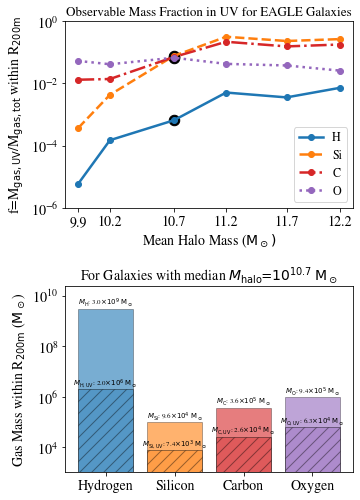

In [9]:
fig = plt.figure(figsize=(5, 7))
ax2 = fig.add_axes([0.17, 0.58, 0.8, 0.37])  ## top 
ax = fig.add_axes([0.17, 0.055, 0.8, 0.37])  ## bottom 

import seaborn as sns
cmap = sns.color_palette()
cs = [cmap[0], cmap[1], cmap[3], cmap[4]]
x = ['Hydrogen', 'Silicon', 'Carbon', 'Oxygen']
al = 0.6
fs = 14

mass_ind = sample_mean_ind
height_tot = [tot_mass_H[mass_ind], tot_mass_Si[mass_ind], tot_mass_C[mass_ind], tot_mass_O[mass_ind]]
height_low = [tot_mass_HI[mass_ind], tot_mass_Silow[mass_ind], tot_mass_Clow[mass_ind], tot_mass_OVI[mass_ind]]

bar_tot = ax.bar(x, height_tot, color=cs, alpha=al, lw=0.5, edgecolor='k')
bar_low = ax.bar(x, height_low, hatch='//', color=cs, alpha=al-0.2, edgecolor='k')
ax.set_yscale('log')

ax.tick_params(labelsize=fs)
if rlabel == 'useR200m': 
    ax.set_ylim(1e3, np.max(height_tot)*8)
else: 
    ax.set_ylim(1e3, np.max(height_tot)*8)
ax.set_ylabel(r'Gas Mass within R$_{\rm 200m}$ ($\rm M_\odot$)', fontsize=fs)

# Add counts above the two bar graphs
log_htot = np.floor(np.log10(height_tot))
labels_tot = [r'$M_{\rm H}$: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_tot[0]/(10**log_htot[0]), log_htot[0]), 
              r'$M_{\rm Si}$: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_tot[1]/(10**log_htot[1]), log_htot[1]), 
              r'$M_{\rm C}$: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_tot[2]/(10**log_htot[2]), log_htot[2]), 
              r'$M_{\rm O}$: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_tot[3]/(10**log_htot[3]), log_htot[3]),]
for i, rect in enumerate(bar_tot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, 
            labels_tot[i], ha='center', va='bottom', fontsize=fs-7)

# for observable mass in UV 
log_hlow = np.floor(np.log10(height_low))
labels_low = [r'$M_{\rm H,UV}$: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_low[0]/(10**log_hlow[0]), log_hlow[0]), 
              r'$M_{\rm Si,UV}$: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_low[1]/(10**log_hlow[1]), log_hlow[1]), 
              r'$M_{\rm C,UV}$: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_low[2]/(10**log_hlow[2]), log_hlow[2]), 
              r'$M_{\rm O,UV}$: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_low[3]/(10**log_hlow[3]), log_hlow[3])]
for i, rect in enumerate(bar_low):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, 
            labels_low[i], ha='center', va='bottom', fontsize=fs-7)
    
ax.set_title(r'For Galaxies with median $M_{\rm halo}$=$10^{%.1f}$ $\rm M_\odot$'%(medlogN_tb['mean(Mhalo)'][mass_ind]), 
                                                                   fontsize=fs)

####################### 
fmass_C = tot_mass_Clow/tot_mass_C
fmass_Si = tot_mass_Silow/tot_mass_Si
fmass_H = tot_mass_HI/tot_mass_H
fmass_O = tot_mass_OVI/tot_mass_O

lw = 2.5
ls = ['-', '--', '-.', ':']

med_logmh = medlogN_tb['mean(Mhalo)']
ax2.plot(med_logmh, fmass_H, color=cs[0], label='H', lw=lw, ls=ls[0], marker='o')
ax2.plot(med_logmh, fmass_Si, color=cs[1], label='Si', lw=lw, ls=ls[1], marker='o')
ax2.plot(med_logmh, fmass_C, color=cs[2], label='C', lw=lw, ls=ls[2], marker='o')
ax2.plot(med_logmh, fmass_O, color=cs[3], label='O', lw=lw, ls=ls[3], marker='o')

scc = sample_mean_ind # the one with median mass closet to observational sample 
ax2.scatter([med_logmh[scc], med_logmh[scc], med_logmh[scc], med_logmh[scc]], 
           [fmass_H[scc], fmass_Si[scc], fmass_C[scc], fmass_O[scc]], marker='o', s=110,lw=1,
           color='k', )
ax2.set_yscale('log')
#ax2.set_yticks([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-3, 1e-1])
ax2.legend(fontsize=fs-2)
ax2.set_xticks(med_logmh)
ax2.set_xticklabels(['%.1f'%imass for imass in med_logmh])
ax2.tick_params(labelsize=fs)
ax2.set_xlabel(r'Mean Halo Mass ($\rm M_\odot)$', fontsize=fs)
ax2.set_ylabel(r'f=M$_{\rm gas,UV}$/M$_{\rm gas,tot}$ within R$_{\rm 200m}$', fontsize=fs)
ax2.set_title('Observable Mass Fraction in UV for EAGLE Galaxies', fontsize=fs-1)
#ax2.axhline(1.0)
ax2.set_ylim(10**(-6), 1)

# fig.tight_layout()
fig.savefig('figs/fig9_eagle_mass_elements_{}_meanlogN.pdf'.format(rlabel))

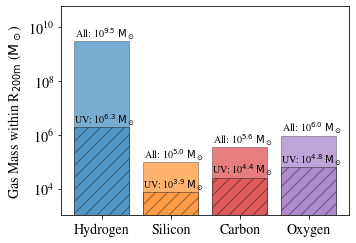

In [10]:
fig = plt.figure(figsize=(5, 3.3))
ax = fig.add_axes([0.17, 0.1, 0.8, 0.88])

import seaborn as sns
cmap = sns.color_palette()
cs = [cmap[0], cmap[1], cmap[3], cmap[4]]
x = ['Hydrogen', 'Silicon', 'Carbon', 'Oxygen']
al = 0.6
fs = 14

mass_ind = sample_mean_ind
height_tot = [tot_mass_H[mass_ind], tot_mass_Si[mass_ind], tot_mass_C[mass_ind], tot_mass_O[mass_ind]]
height_low = [tot_mass_HI[mass_ind], tot_mass_Silow[mass_ind], tot_mass_Clow[mass_ind], tot_mass_OVI[mass_ind]]

bar_tot = ax.bar(x, height_tot, color=cs, alpha=al, lw=0.5, edgecolor='k')
bar_low = ax.bar(x, height_low, hatch='//', color=cs, alpha=al-0.2, edgecolor='k')
ax.set_yscale('log')

ax.tick_params(labelsize=fs)
if rlabel == 'useR200m': 
    ax.set_ylim(1e3, np.max(height_tot)*20)
else: 
    ax.set_ylim(1e3, np.max(height_tot)*8)
ax.set_ylabel(r'Gas Mass within R$_{\rm 200m}$ ($\rm M_\odot$)', fontsize=fs)

# Add counts above the two bar graphs
log_htot = np.log10(height_tot)
#labels_tot = [r'All: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_tot[0]/(10**log_htot[0]), log_htot[0]), 
#              r'All: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_tot[1]/(10**log_htot[1]), log_htot[1]), 
#              r'All: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_tot[2]/(10**log_htot[2]), log_htot[2]), 
#              r'All: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_tot[3]/(10**log_htot[3]), log_htot[3]),]
labels_tot = [r'All: 10$^{%.1f}$ $\rm M_\odot$'%(log_htot[0]),  
              r'All: 10$^{%.1f}$ $\rm M_\odot$'%(log_htot[1]),  
              r'All: 10$^{%.1f}$ $\rm M_\odot$'%(log_htot[2]), 
              r'All: 10$^{%.1f}$ $\rm M_\odot$'%(log_htot[3])]
for i, rect in enumerate(bar_tot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()*0.55, height, 
            labels_tot[i], ha='center', va='bottom', fontsize=fs-4)

# for observable mass in UV 
log_hlow = np.log10(height_low)
#labels_low = [r'UV: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_low[0]/(10**log_hlow[0]), log_hlow[0]), 
#              r'UV: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_low[1]/(10**log_hlow[1]), log_hlow[1]), 
#              r'UV: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_low[2]/(10**log_hlow[2]), log_hlow[2]), 
#              r'UV: %.1f$\times10^{%d}$ $\rm M_\odot$'%(height_low[3]/(10**log_hlow[3]), log_hlow[3])]
labels_low = [r'UV: 10$^{%.1f}$ $\rm M_\odot$'%(log_hlow[0]), 
              r'UV: 10$^{%.1f}$ $\rm M_\odot$'%(log_hlow[1]), 
              r'UV: 10$^{%.1f}$ $\rm M_\odot$'%(log_hlow[2]), 
              r'UV: 10$^{%.1f}$ $\rm M_\odot$'%(log_hlow[3])]
for i, rect in enumerate(bar_low):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()*0.55, height, 
            labels_low[i], ha='center', va='bottom', fontsize=fs-4)
    
print()
#ax.set_title(r'For Galaxies with median $M_{\rm 200m}$=$10^{%.1f}$ $\rm M_\odot$'%(medlogN_tb['med(Mhalo)'][mass_ind]), 
#                                                                   fontsize=fs)

# fig.tight_layout()
fig.savefig('figs/fig9_eagle_mass_elements_{}_meanlogN_1panel.pdf'.format(rlabel))

In [12]:
10**6.3 / 10**9.5

0.000630957344480193

In [14]:
10**4.7/10**8.3

0.00025118864315095774

In [15]:
10**3.9 / 10**5.0

0.07943282347242814

In [16]:
10**4.4 / 10**5.6

0.06309573444801943

In [18]:
10**4.8 / 10**6.0

0.0630957344480193

In [21]:
10**5.3 / 10**4.2

12.589254117941664